# ***DIABETES PREDICTION***

**Name:Atharva Thakur**<br>
**Roll no:20101B0020**<br>
**Branch:INFT**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.metrics import confusion_matrix


warnings.filterwarnings('ignore')
df = pd.read_csv('diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
df.head()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


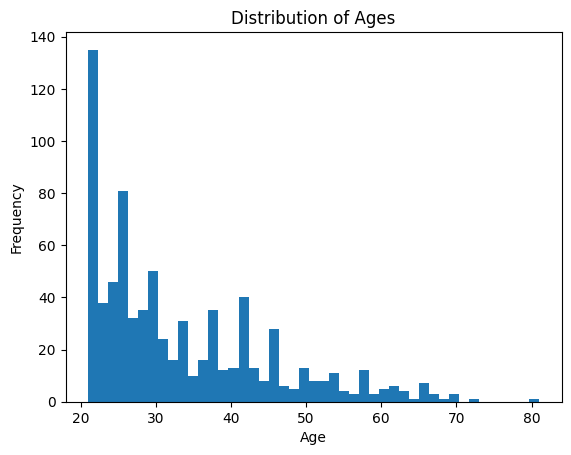

In [32]:
ages = (df['Age'])
plt.hist(ages, bins=45)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

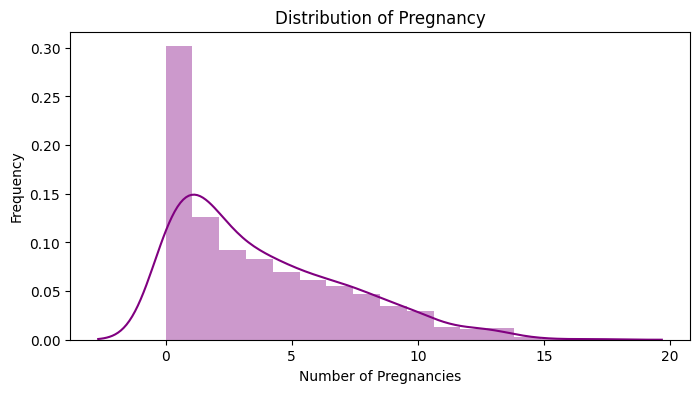

In [33]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))

plot=sns.distplot(df['Pregnancies'],ax=axes,color='purple')
axes.set_title('Distribution of Pregnancy')
axes.set_xlabel('Number of Pregnancies')
axes.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

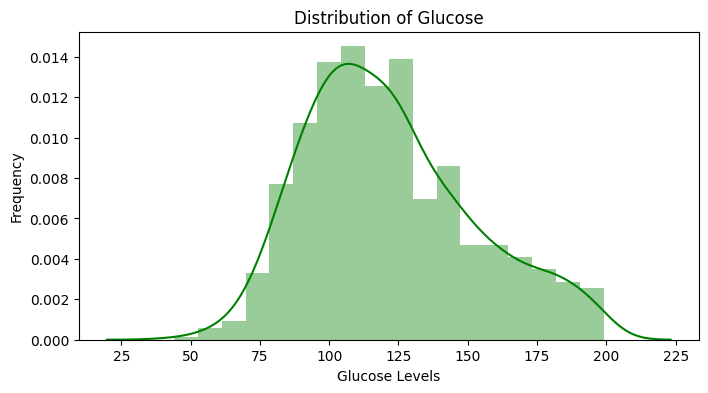

In [34]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())

plot=sns.distplot(df['Glucose'],ax=axes,color='green')
axes.set_title('Distribution of Glucose')
axes.set_xlabel('Glucose Levels')
axes.set_ylabel('Frequency')


Text(0.5, 1.0, 'Box Plot of Blood Pressure')

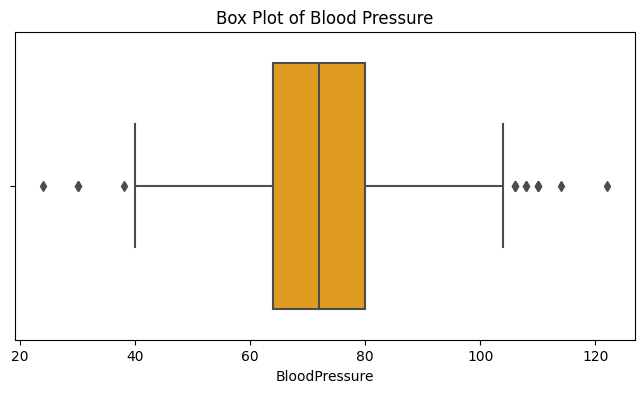

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
plot = sns.boxplot(x='BloodPressure', data=df, ax=axes, color='orange')
axes.set_title('Box Plot of Blood Pressure')


Text(0, 0.5, 'Frequency')

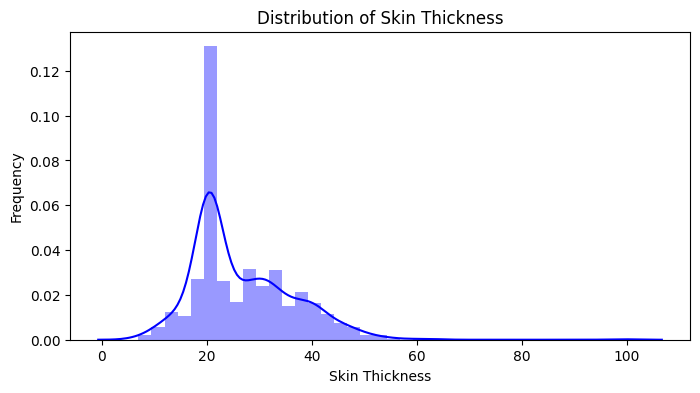

In [36]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
plot=sns.distplot(df['SkinThickness'],ax=axes,color='blue')
axes.set_title('Distribution of Skin Thickness')
axes.set_xlabel('Skin Thickness')
axes.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

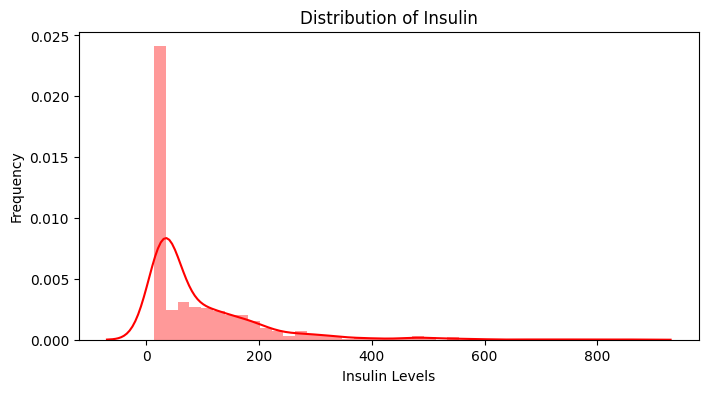

In [37]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize = (8,4))
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
plot=sns.distplot(df['Insulin'],ax=axes,color='red')
axes.set_title('Distribution of Insulin')
axes.set_xlabel('Insulin Levels')
axes.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

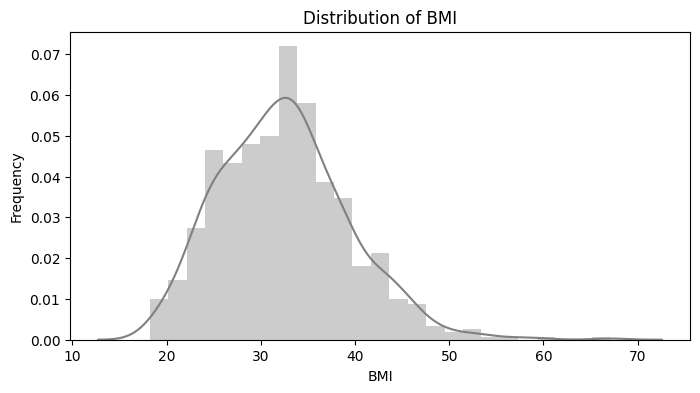

In [38]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.BMI = df.BMI.replace(0,df.BMI.mean())
plot=sns.distplot(df['BMI'],ax=axes,color='grey')
axes.set_title('Distribution of BMI')
axes.set_xlabel('BMI')
axes.set_ylabel('Frequency')

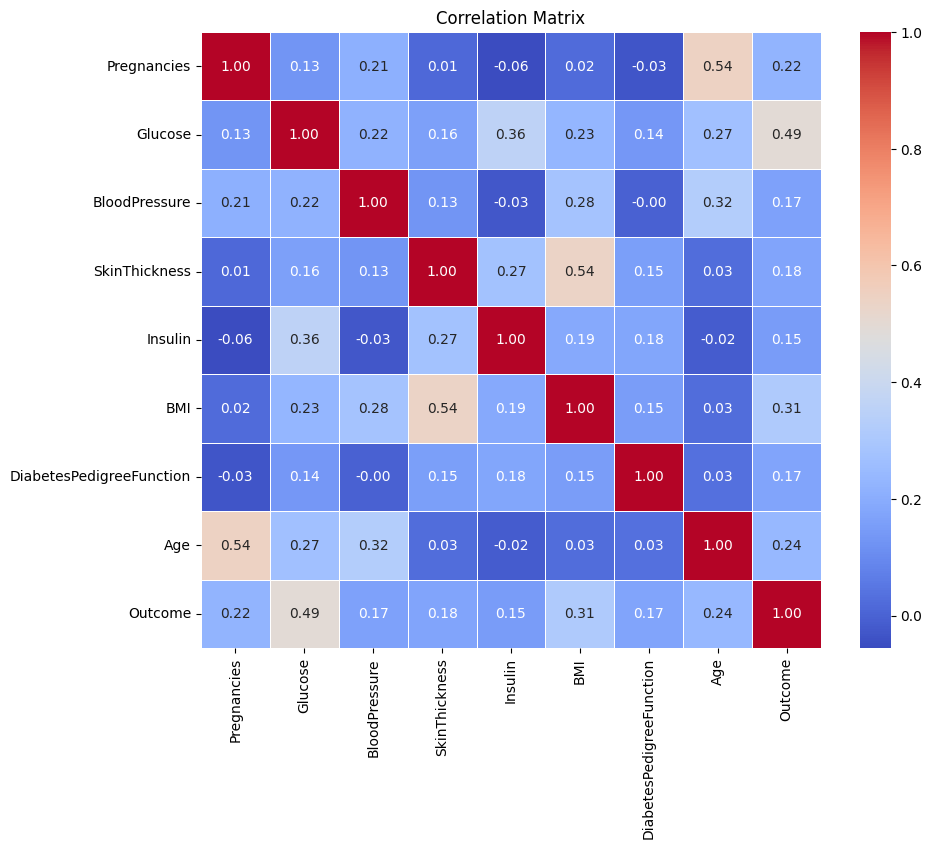

In [56]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



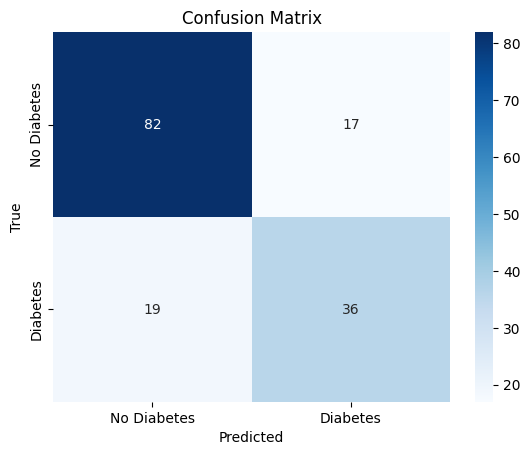

The model predicts that the person does not have diabetes.


In [57]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_rep)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




# Define new values for prediction
new_values = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [120],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [80],
    'BMI': [25],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [25]
})

# Scale the new values using the same scaler
new_values_scaled = scaler.transform(new_values)

# Make predictions using the trained model
prediction = model.predict(new_values_scaled)

# Display the prediction
if prediction[0] == 1:
    print("The model predicts that the person has diabetes.")
else:
    print("The model predicts that the person does not have diabetes.")




XGBoost Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



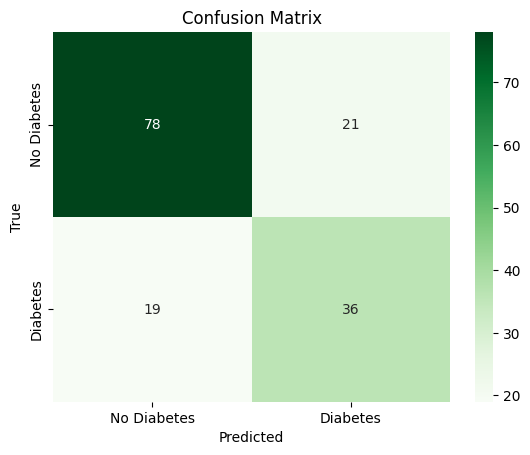

The model predicts that the person does not have diabetes.


In [58]:
import xgboost as xgb

# Convert data to DMatrix format used by XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Set hyperparameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'logloss'
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(dtest)
y_pred_xgb_binary = [1 if pred > 0.5 else 0 for pred in y_pred_xgb]

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_binary)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_binary)
classification_rep_xgb = classification_report(y_test, y_pred_xgb_binary)

# Display the results for XGBoost
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

print("\nClassification Report:")
print(classification_rep_xgb)

sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Greens",
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Define new values for prediction
new_values = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [120],
    'BloodPressure': [70],
    'SkinThickness': [30],
    'Insulin': [80],
    'BMI': [25],
    'DiabetesPedigreeFunction': [0.5],
    'Age': [25]
})

# Scale the new values using the same scaler
new_values_scaled = scaler.transform(new_values)

# Convert the new values to DMatrix format used by XGBoost
new_values_dmatrix = xgb.DMatrix(new_values_scaled)

# Make predictions using the trained XGBoost model
prediction_prob = xgb_model.predict(new_values_dmatrix)
prediction_binary = [1 if prob > 0.5 else 0 for prob in prediction_prob]

# Display the prediction
if prediction_binary[0] == 1:
    print("The model predicts that the person has diabetes.")
else:
    print("The model predicts that the person does not have diabetes.")

